# Importing Libraries

In [1]:
import os
import pathlib
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.utils import to_categorical
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

# Exploring Data

In [2]:
size = 100
path = "augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/"

Displaying images from the 'MildDemented' category:


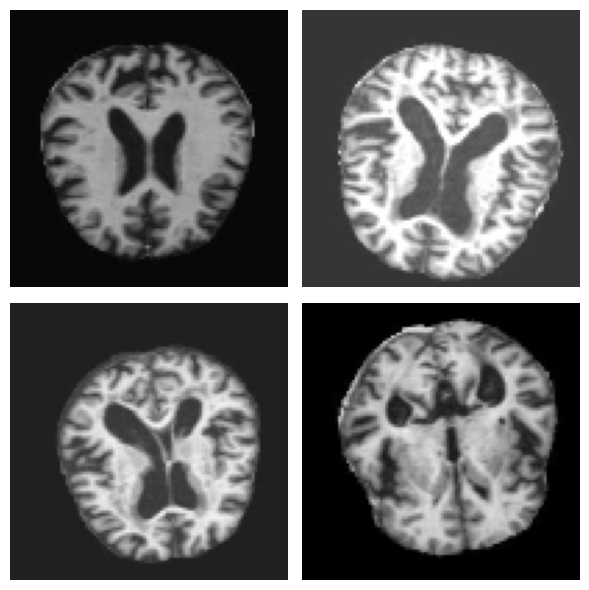

In [3]:
subclass = "MildDemented"

print(f"Displaying images from the '{subclass}' category:")

image_files = os.listdir(os.path.join(path, subclass))
selected_images = random.sample(image_files, 4)
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
for ax, image_name in zip(axes.flatten(), selected_images):
    img_path = os.path.join(path, subclass, image_name)
    img = load_img(img_path, target_size=(size, size))
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()

Displaying images from the 'ModerateDemented' category:


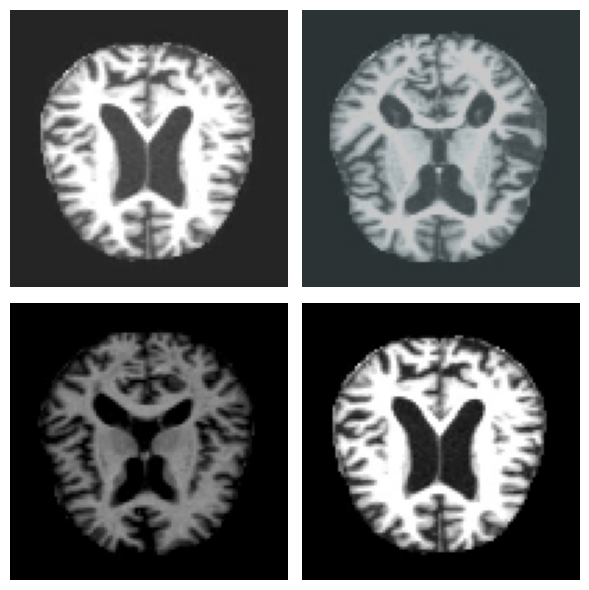

In [4]:
subclass = "ModerateDemented"

print(f"Displaying images from the '{subclass}' category:")

image_files = os.listdir(os.path.join(path, subclass))
selected_images = random.sample(image_files, 4)
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
for ax, image_name in zip(axes.flatten(), selected_images):
    img_path = os.path.join(path, subclass, image_name)
    img = load_img(img_path, target_size=(size, size))
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()

Displaying images from the 'VeryMildDemented' category:


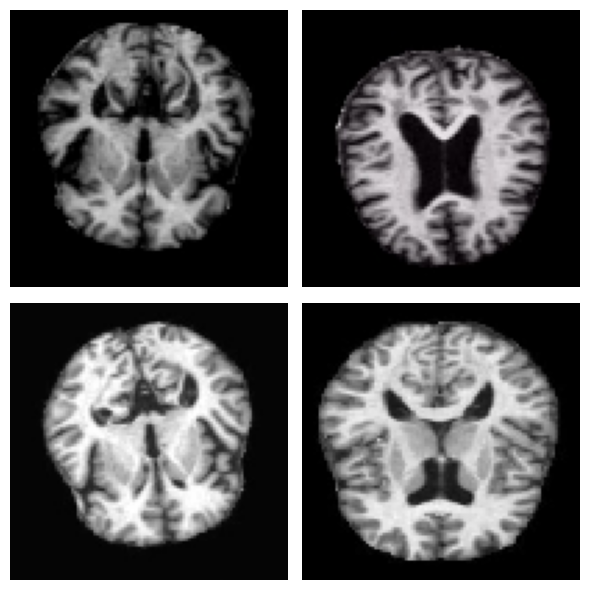

In [5]:
subclass = "VeryMildDemented"

print(f"Displaying images from the '{subclass}' category:")

image_files = os.listdir(os.path.join(path, subclass))
selected_images = random.sample(image_files, 4)
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
for ax, image_name in zip(axes.flatten(), selected_images):
    img_path = os.path.join(path, subclass, image_name)
    img = load_img(img_path, target_size=(size, size))
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()

Displaying images from the 'NonDemented' category:


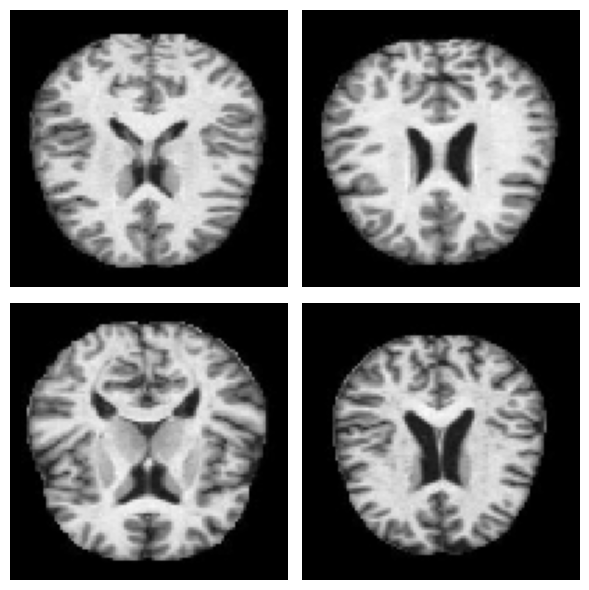

In [6]:
subclass = "NonDemented"

print(f"Displaying images from the '{subclass}' category:")

image_files = os.listdir(os.path.join(path, subclass))
selected_images = random.sample(image_files, 4)
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
for ax, image_name in zip(axes.flatten(), selected_images):
    img_path = os.path.join(path, subclass, image_name)
    img = load_img(img_path, target_size=(size, size))
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()

# Data Pre-processing 

In [7]:
data_dir = pathlib.Path(path)

In [8]:
size_per_class = 3000

Mild_Demented = random.sample(list(data_dir.glob('MildDemented/*')), size_per_class)
Moderate_Demented = random.sample(list(data_dir.glob('ModerateDemented/*')), size_per_class)
Very_Mild_Demented = random.sample(list(data_dir.glob('VeryMildDemented/*')), size_per_class)
Non_Demented = random.sample(list(data_dir.glob('NonDemented/*')), size_per_class)

print(f"Selected {len(Mild_Demented)} images for Mild Demented class.")
print(f"Selected {len(Moderate_Demented)} images for Moderate Demented class.")
print(f"Selected {len(Very_Mild_Demented)} images for Very Mild Demented class.")
print(f"Selected {len(Non_Demented)} images for Non Demented class.")

Selected 3000 images for Mild Demented class.
Selected 3000 images for Moderate Demented class.
Selected 3000 images for Very Mild Demented class.
Selected 3000 images for Non Demented class.


In [9]:
df_images = {'Mild_Demented': Mild_Demented, 'Moderate_Demented': Moderate_Demented, 
             'Very_Mild_Demented': Very_Mild_Demented, 'Non_Demented': Non_Demented}

df_labels = {'Mild_Demented': 0, 'Moderate_Demented': 1, 'Very_Mild_Demented': 2, 'Non_Demented': 3}

In [10]:
x, y = [], []
image_size = (75, 75)

for label, image_paths in df_images.items():
    for img_path in image_paths:
        try:
            img = imread(str(img_path))
            resized_img = resize(img, image_size, anti_aliasing=True)
            x.append(resized_img)
            y.append(df_labels[label])
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

x = np.array(x)
y = np.array(y)

In [11]:
x = x/255.0

In [12]:
y = np.asarray(y).astype('float32').reshape((-1,1))
y = to_categorical(y, num_classes = 4)

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [14]:
len(x_train)

9600

In [15]:
len(x_test)

2400

# 3-Layer CNN Network

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model

In [17]:
epochs = 50
input_shape = (75, 75, 3)

In [18]:
model = Sequential()

# First convolutional block
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional block
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional block
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 73, 73, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 73, 73, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 34, 34, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 15, 15, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 15, 15, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,605,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,733,444 (6.61 MB)

 Trainable params: 1,732,996 (6.61 MB)

 Non-trainable params: 448 (1.75 KB)

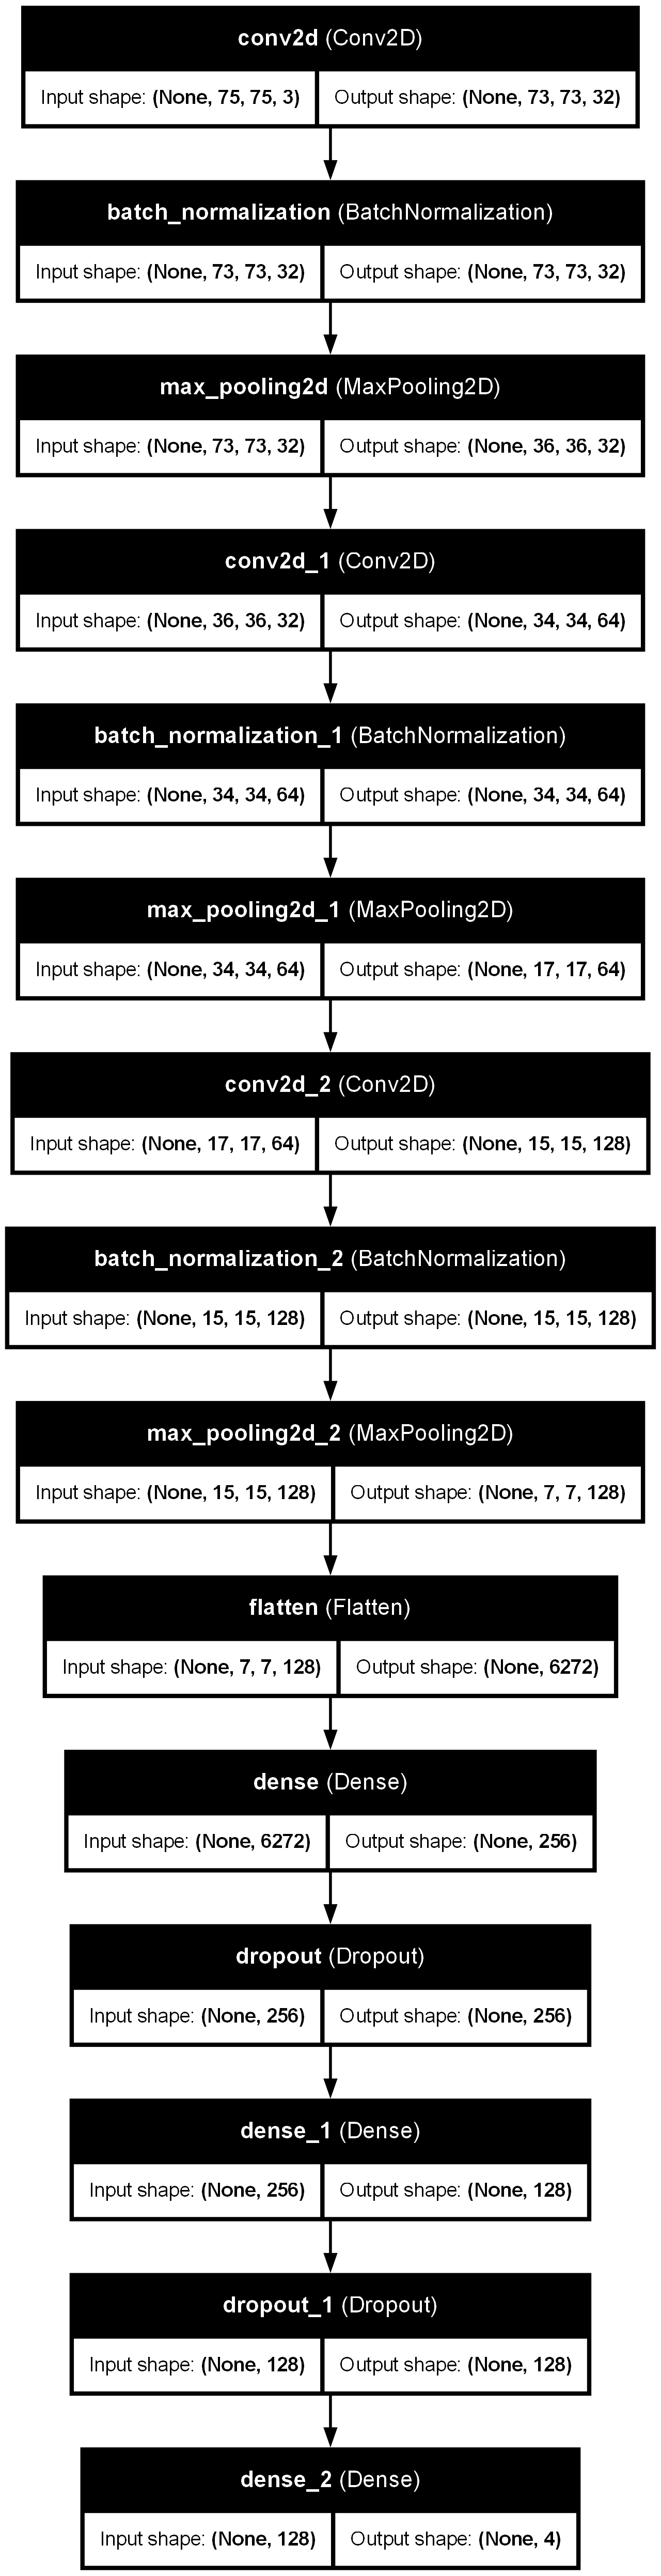

In [19]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [20]:
def training_history(history, metrics=['loss', 'accuracy'], figsize=(10, 5)):
    
    for metric in metrics:
        plt.figure(figsize=figsize)
        plt.plot(history.history[metric], label=f"Training {metric.capitalize()}")
        plt.plot(history.history[f"val_{metric}"], label=f"Validation {metric.capitalize()}")
        plt.xlabel("Epochs")
        plt.ylabel(metric.capitalize())
        plt.title(f"Training and Validation {metric.capitalize()}")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()

In [21]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 57s 181ms/step - accuracy: 0.2850 - loss: 1.7650 - val_accuracy: 0.2442 - val_loss: 6.3588
Epoch 2/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 53s 178ms/step - accuracy: 0.3279 - loss: 1.3402 - val_accuracy: 0.2367 - val_loss: 4.2402
Epoch 3/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 54s 179ms/step - accuracy: 0.3576 - loss: 1.2983 - val_accuracy: 0.4554 - val_loss: 1.1490
Epoch 4/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 54s 179ms/step - accuracy: 0.4154 - loss: 1.2326 - val_accuracy: 0.4779 - val_loss: 1.1680
Epoch 5/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 54s 179ms/step - accuracy: 0.4410 - loss: 1.2144 - val_accuracy: 0.5879 - val_loss: 1.0306
Epoch 6/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 54s 182ms/step - accuracy: 0.4601 - loss: 1.1760 - val_accuracy: 0.2775 - val_loss: 1.4286
Epoch 7/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 54s 180ms/step - accuracy: 0.5198 - loss: 1.0760 - val_accuracy: 0.3221 - val_loss: 10.5637
Epoch 8/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 54s 179ms/step - accuracy: 0.5555 - loss: 

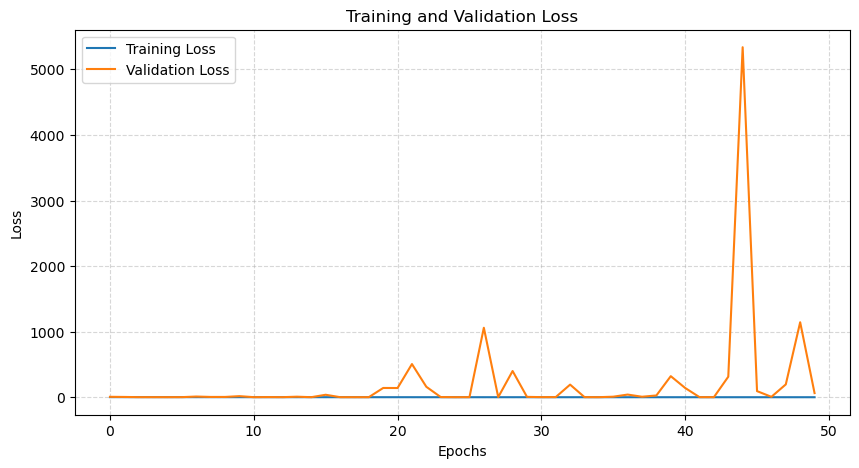

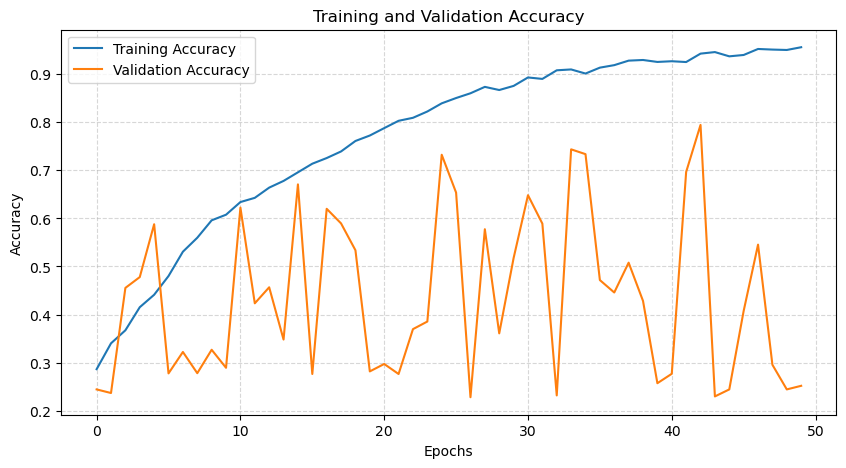

In [22]:
training_history(history)

75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


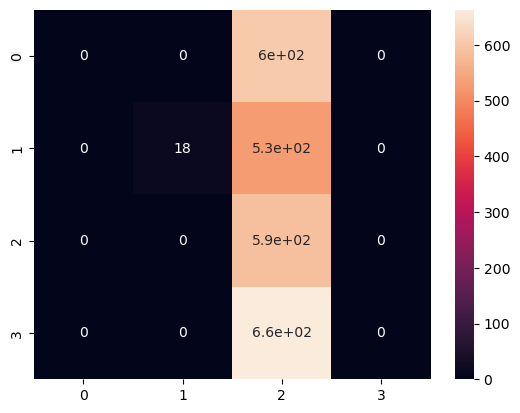

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(x_test)

predicted_classes = np.argmax(y_pred, axis=1)
true_values = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(true_values, predicted_classes)

sns.heatmap(cm, annot=True)
plt.show()

In [40]:
cr = classification_report(true_values, predicted_classes)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       604
           1       1.00      0.03      0.06       547
           2       0.25      1.00      0.39       586
           3       0.00      0.00      0.00       663

    accuracy                           0.25      2400
   macro avg       0.31      0.26      0.11      2400
weighted avg       0.29      0.25      0.11      2400



# 5-Layer CNN

In [41]:
model = Sequential()

# First convolutional block
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional block
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

# Third convolutional block
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth convolutional block
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

# Fifth convolutional block
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 73, 73, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 73, 73, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 34, 34, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 34, 34, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             5

 Total params: 1,354,020 (5.17 MB)

 Trainable params: 1,353,380 (5.16 MB)

 Non-trainable params: 640 (2.50 KB)

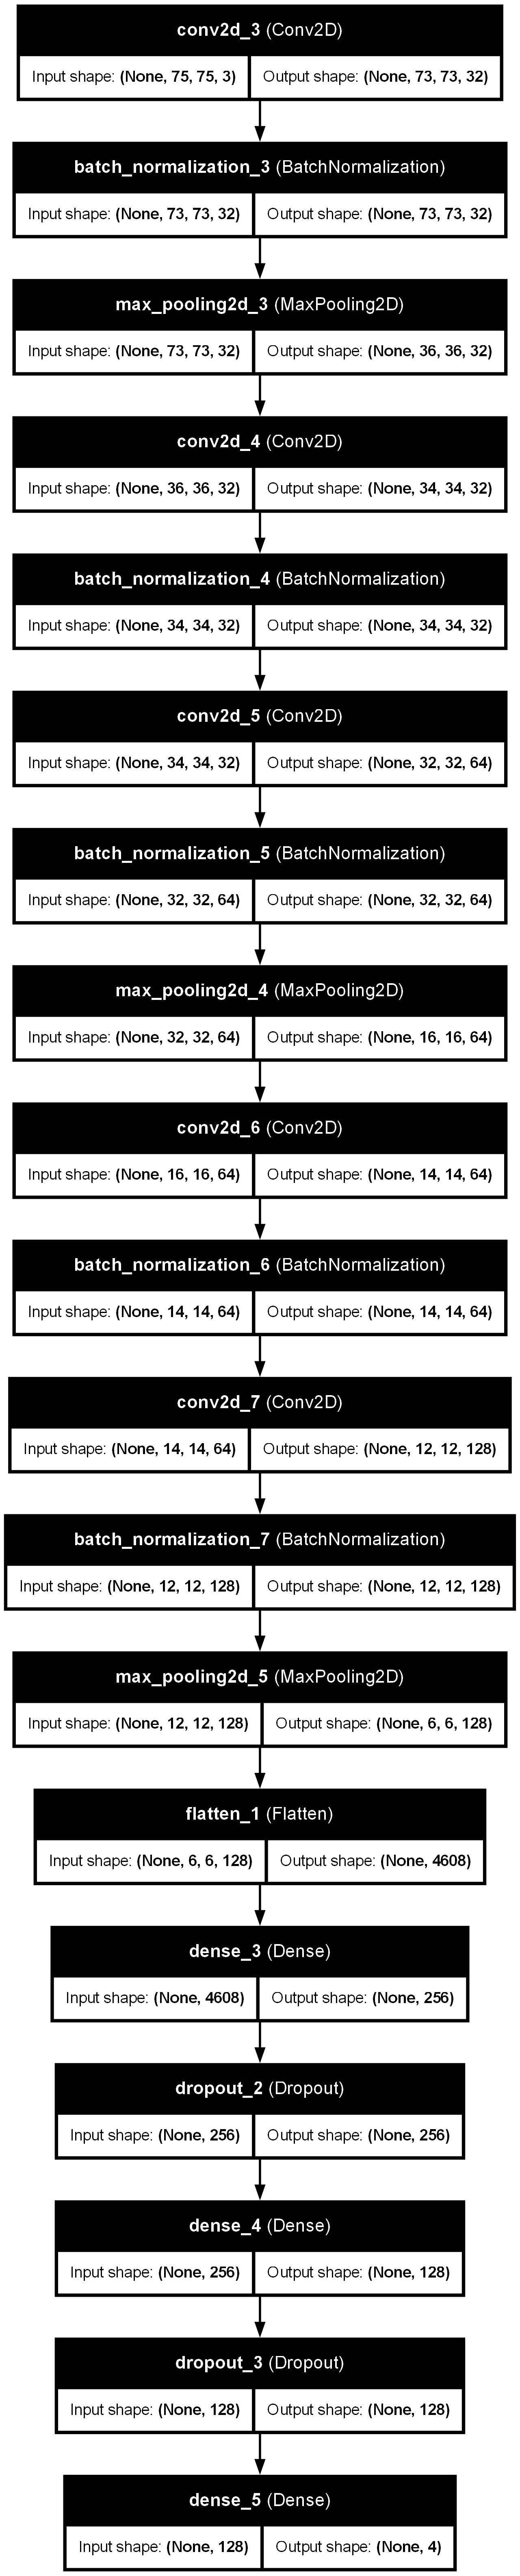

In [42]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [43]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 60s 189ms/step - accuracy: 0.3334 - loss: 1.7936 - val_accuracy: 0.2763 - val_loss: 3.3605
Epoch 2/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 56s 187ms/step - accuracy: 0.4990 - loss: 1.0489 - val_accuracy: 0.2829 - val_loss: 1.9616
Epoch 3/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 56s 188ms/step - accuracy: 0.5519 - loss: 0.9244 - val_accuracy: 0.5446 - val_loss: 0.8955
Epoch 4/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 56s 187ms/step - accuracy: 0.5830 - loss: 0.8455 - val_accuracy: 0.6658 - val_loss: 0.7378
Epoch 5/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 57s 189ms/step - accuracy: 0.6405 - loss: 0.7656 - val_accuracy: 0.6542 - val_loss: 0.7380
Epoch 6/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 58s 194ms/step - accuracy: 0.6704 - loss: 0.7278 - val_accuracy: 0.6983 - val_loss: 0.6908
Epoch 7/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 57s 189ms/step - accuracy: 0.6926 - loss: 0.6700 - val_accuracy: 0.7233 - val_loss: 0.6211
Epoch 8/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 57s 188ms/step - accuracy: 0.7293 - loss: 0

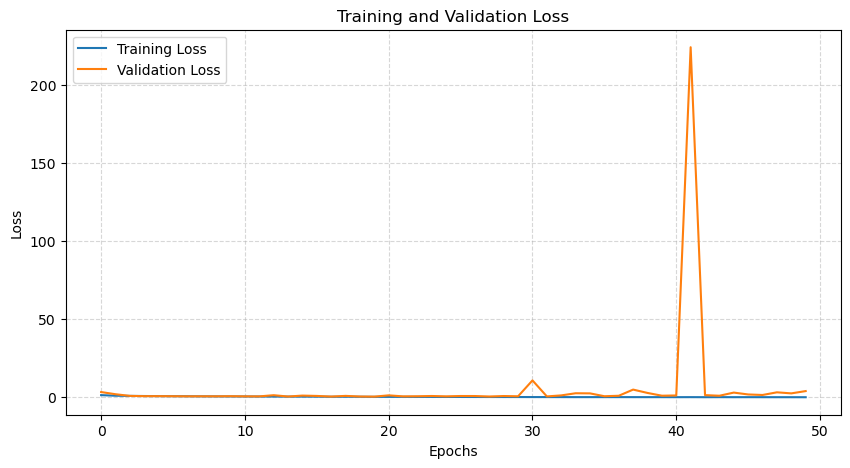

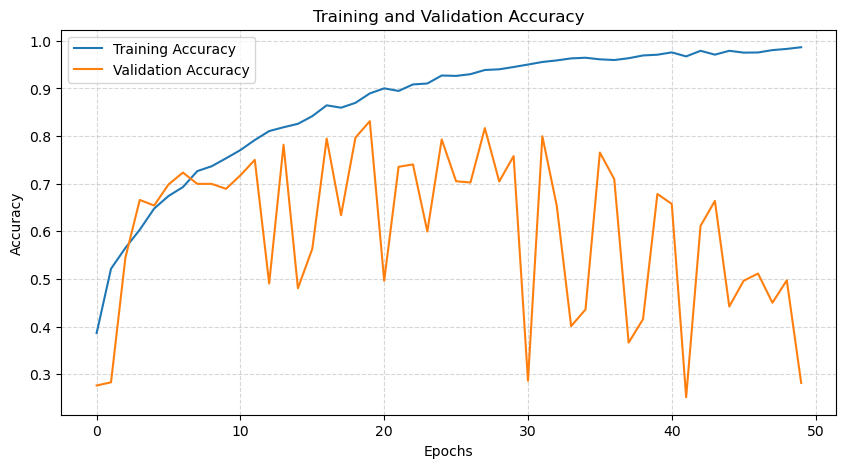

In [44]:
training_history(history)

75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step


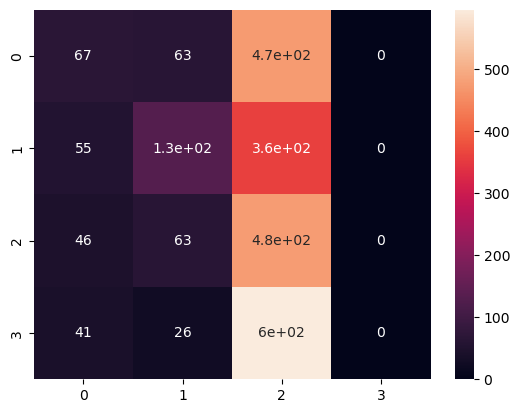

In [ ]:
y_pred = model.predict(x_test)

predicted_classes = np.argmax(y_pred, axis=1)
true_values = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(true_values, predicted_classes)

sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
cr = classification_report(true_values, predicted_classes)
print(cr)

              precision    recall  f1-score   support

           0       0.32      0.11      0.16       604
           1       0.46      0.24      0.32       547
           2       0.25      0.81      0.38       586
           3       0.00      0.00      0.00       663

    accuracy                           0.28      2400
   macro avg       0.26      0.29      0.22      2400
weighted avg       0.25      0.28      0.21      2400



# 7-Layer CNN

In [47]:
model = Sequential()

# First convolutional block
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional block
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

# Third convolutional block
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth convolutional block
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

# Fifth convolutional block
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Sixth convolutional block
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

# Seventh convolutional block
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 73, 73, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 73, 73, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 34, 34, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 34, 34, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 2, 2, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 1, 1, 256)           │              

 Total params: 684,196 (2.61 MB)

 Trainable params: 682,788 (2.60 MB)

 Non-trainable params: 1,408 (5.50 KB)

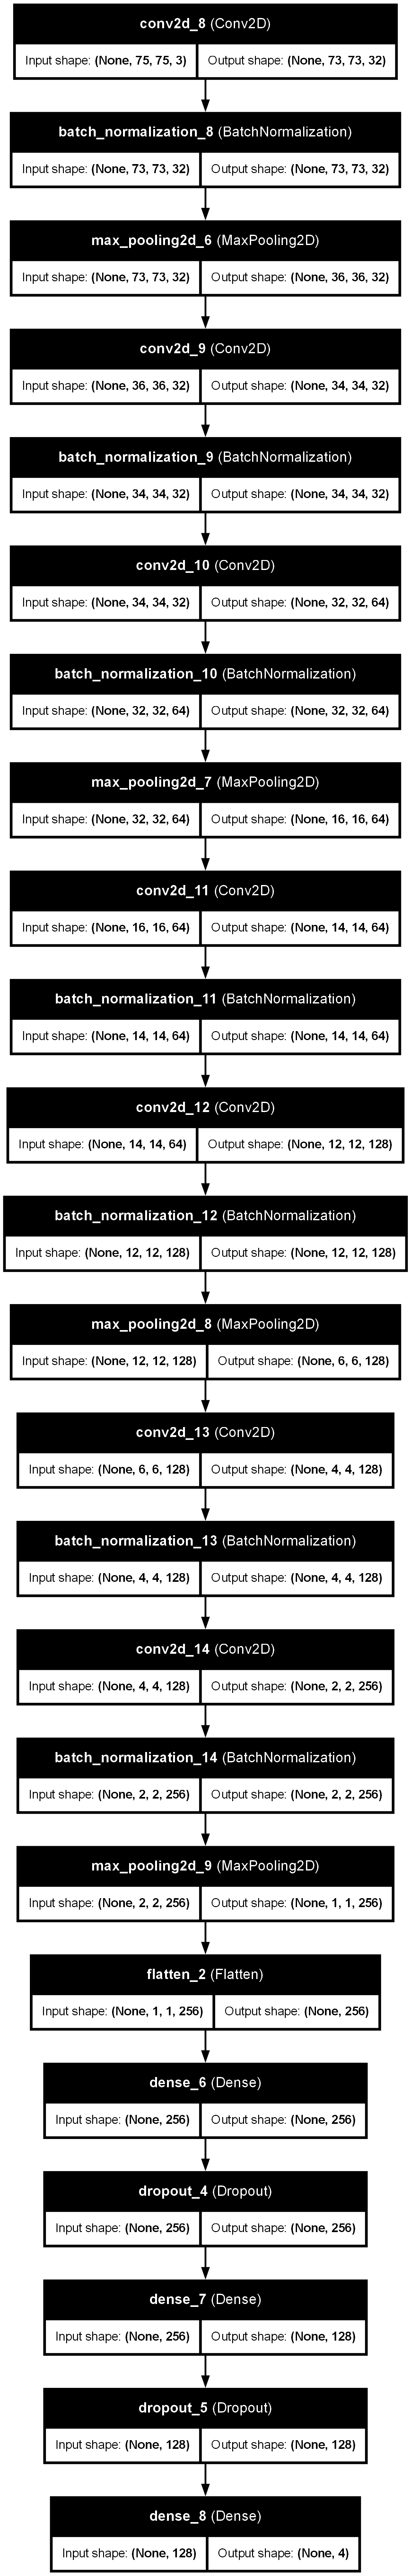

In [48]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [49]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 63s 190ms/step - accuracy: 0.4016 - loss: 1.4123 - val_accuracy: 0.2763 - val_loss: 1.9202
Epoch 2/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 55s 185ms/step - accuracy: 0.6146 - loss: 0.8288 - val_accuracy: 0.3971 - val_loss: 1.4993
Epoch 3/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 56s 186ms/step - accuracy: 0.6618 - loss: 0.7233 - val_accuracy: 0.6500 - val_loss: 0.7345
Epoch 4/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 55s 184ms/step - accuracy: 0.7017 - loss: 0.6392 - val_accuracy: 0.7133 - val_loss: 0.6556
Epoch 5/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 56s 188ms/step - accuracy: 0.7539 - loss: 0.5565 - val_accuracy: 0.5983 - val_loss: 0.9912
Epoch 6/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 54s 181ms/step - accuracy: 0.8066 - loss: 0.4588 - val_accuracy: 0.6417 - val_loss: 0.7105
Epoch 7/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 55s 182ms/step - accuracy: 0.8265 - loss: 0.4107 - val_accuracy: 0.7513 - val_loss: 0.6033
Epoch 8/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 56s 185ms/step - accuracy: 0.8650 - loss: 0

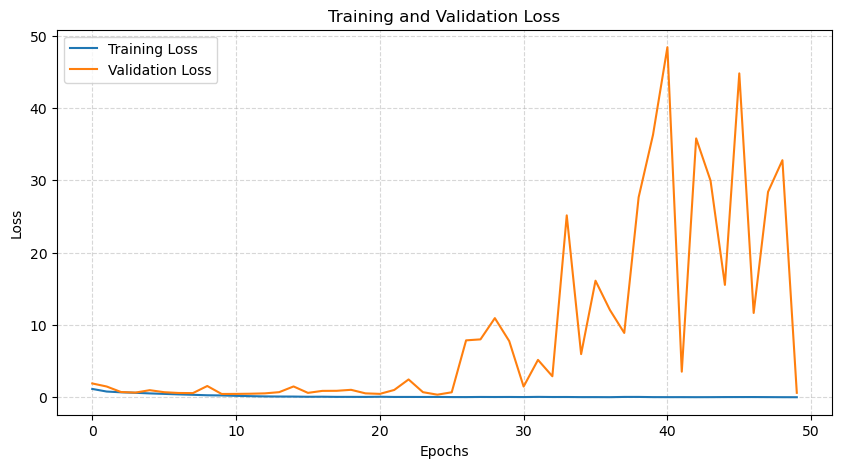

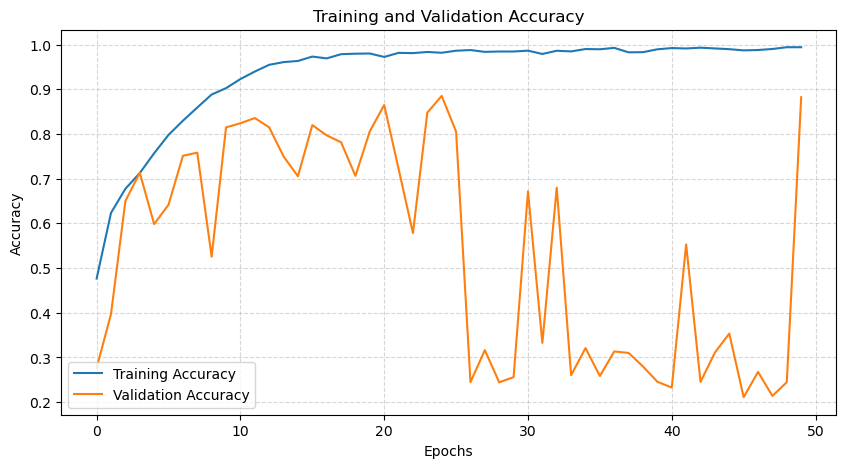

In [50]:
training_history(history)

75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step


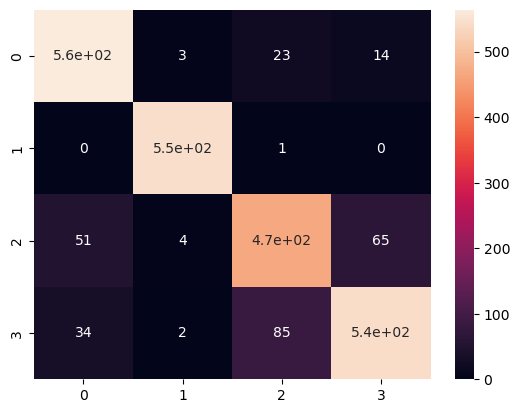

In [51]:
y_pred = model.predict(x_test)

predicted_classes = np.argmax(y_pred, axis=1)
true_values = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(true_values, predicted_classes)

sns.heatmap(cm, annot=True)
plt.show()

In [52]:
cr = classification_report(true_values, predicted_classes)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       604
           1       0.98      1.00      0.99       547
           2       0.81      0.80      0.80       586
           3       0.87      0.82      0.84       663

    accuracy                           0.88      2400
   macro avg       0.88      0.89      0.88      2400
weighted avg       0.88      0.88      0.88      2400

